In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({'font.size': 13})

In [4]:
def load_csv(filename):
    output = pd.read_csv(filename, sep=" ", header=None).drop(columns=3)
    output.columns = ['r','theta','iso']
    delta_g = 2 * np.pi / output.__len__()

    output = output.append({
        "r": output.loc[0].r,
        "theta": (output.iloc[-1].name + 1) * delta_g,
        "iso": 500
    },ignore_index = True)

    res = list(output[['r','theta']].to_numpy())
    xx = list(zip(res, res[1:]))
    xx = list(map(list, xx))
    return output, xx

In [5]:
NAMES = ["../outputs/test_random_uniform_2.out", "Test Random Uniforme", "./plots/mid_res.png"]

output, xx = load_csv(NAMES[0])

with plt.style.context("seaborn-white"):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="polar")
    theta, r = output.theta, output.r
    ax.scatter(theta, r, label='Isoterma')
    
    # Connect two points with a curve
    for curve in xx:
        x = np.linspace(curve[0][1], curve[1][1], 500)
        
        p0 = (curve[0][1], curve[1][1])
        p1 = (curve[0][0], curve[1][0])
        
        y = interp1d(p0, p1)(x)
        ax.plot(x, y, color='b')
        
    ax.set_rorigin(4)
    ax.set_rticks(np.linspace(5, 6.5, 5))  # Less radial ticks
    plt.title(NAMES[1], fontsize=18)
    plt.legend()

# plt.savefig(NAMES[2])


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/test_random_uniform_2.out'

---

## Boxplots tiempos de ejecucion

In [6]:
from glob import glob

In [7]:
TEST_2_FILES = "../outputs/test2/times"
TEST_3_FILES = "../outputs/test3/times"
LU_FILES = "/*LU*.csv"
EG_FILES = "/*EG*.csv"

In [20]:
df_eg = None
# EG Files
for f in glob(TEST_3_FILES + EG_FILES):
#     Load csv
    df = pd.read_csv(f, header=None)
    df.columns = ['time']
    df['exp'] = f.split("/")[-1].replace("_EG_time.csv","").split("_")[0]
    df['exp'] = df['exp'].astype(int)
    if df_eg is None:
        df_eg = df
    else:
        df_eg = pd.concat([df_eg, df])
df_eg = df_eg.sort_values(by='exp')

df_lu = None
# LU Files
for f in glob(TEST_3_FILES + LU_FILES):
    df = pd.read_csv(f, header=None)
    df.columns = ['time']
    df['exp'] = f.split("/")[-1].replace("_LU_time.csv","").split("_")[0]
    df['exp'] = df['exp'].astype(int)
    if df_lu is None:
        df_lu = df
    else:
        df_lu = pd.concat([df_lu, df])
df_lu = df_lu.sort_values(by='exp')

In [21]:
df_lu.to_csv("parsed_lu_test3.csv")
df_eg.to_csv("parsed_eg_test3.csv")

In [22]:
import seaborn as sns

### Aca diviria el plot para tener del 4 al 20 en un plot, y de 24 >= en otro

In [23]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12,8

# Plots Test 3 (2.2)

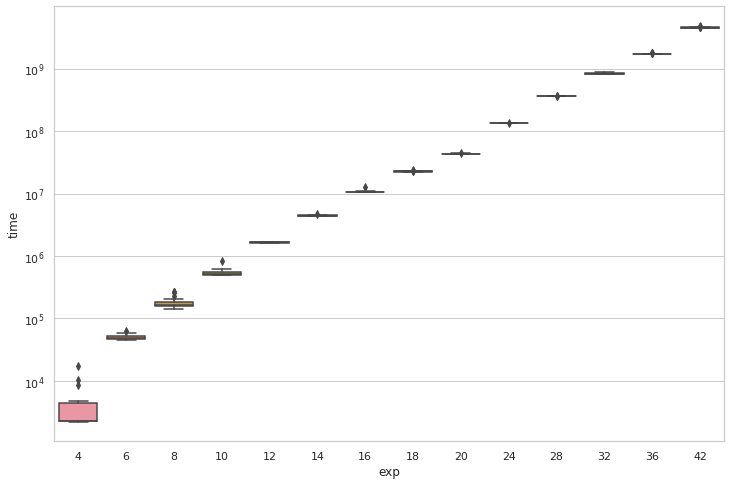

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="exp", y="time", data=df_eg)
plt.yscale('log')
# plt.savefig("plots/30_EG_times.png")

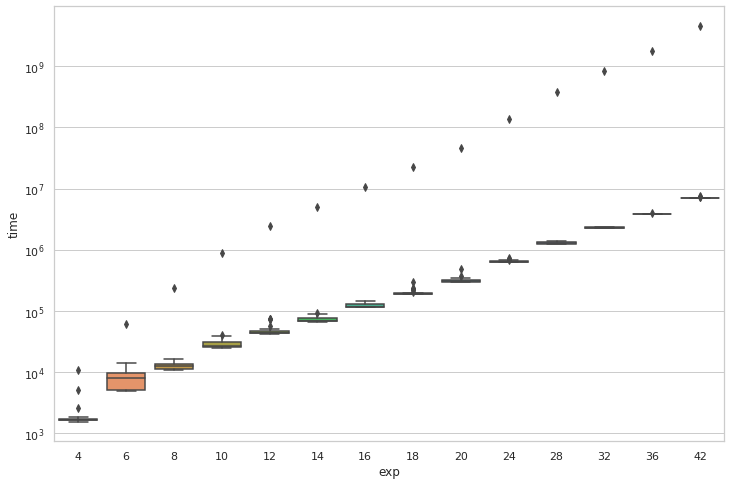

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="exp", y="time", data=df_lu)
plt.yscale('log')
# plt.savefig("plots/30_LU_times.png")

# Plots Test 2 (2.1)

In [13]:
df_eg_2 = None
# EG Files
for f in glob(TEST_2_FILES + EG_FILES):
#     Load csv
    df = pd.read_csv(f, header=None)
    df.columns = ['time']
    df['exp'] = f.split("/")[-1].replace("_EG_time.csv","").split("_")[0]
    df['exp'] = df['exp'].astype(int)
    if df_eg_2 is None:
        df_eg_2 = df
    else:
        df_eg_2 = pd.concat([df_eg_2, df])
df_eg_2 = df_eg_2.sort_values(by='exp')

df_lu_2 = None
# LU Files
for f in glob(TEST_2_FILES + LU_FILES):
    df = pd.read_csv(f, header=None)
    df.columns = ['time']
    df['exp'] = f.split("/")[-1].replace("_LU_time.csv","").split("_")[0]
    df['exp'] = df['exp'].astype(int)
    if df_lu_2 is None:
        df_lu_2 = df
    else:
        df_lu_2 = pd.concat([df_lu_2, df])
df_lu_2 = df_lu_2.sort_values(by='exp')

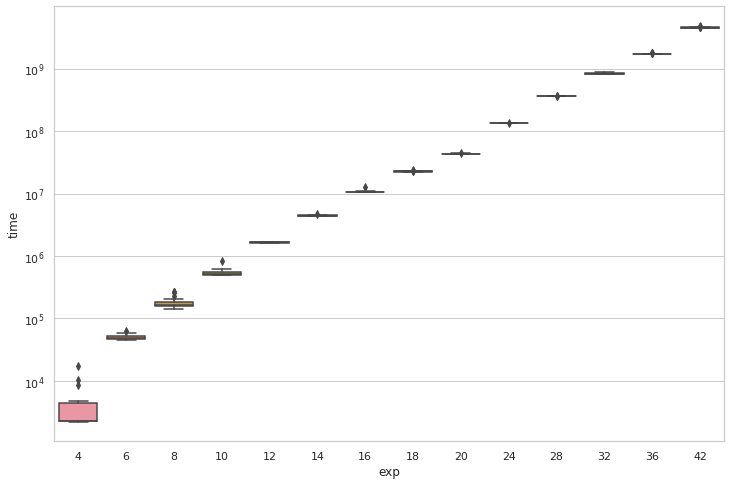

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="exp", y="time", data=df_eg)
plt.yscale('log')
# plt.savefig("plots/1_EG_times.png")

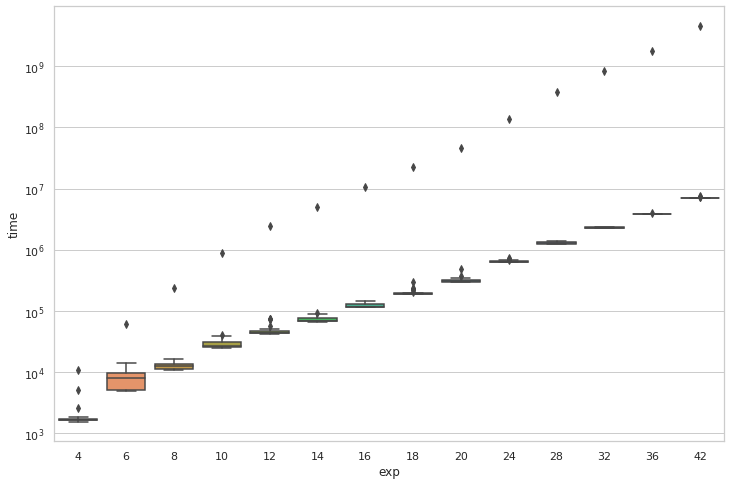

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="exp", y="time", data=df_lu)
plt.yscale('log')
# plt.savefig("plots/1_LU_times.png")

In [16]:
df_lu_2.to_csv("parsed_lu_test2.csv")
df_eg_2.to_csv("parsed_eg_test2.csv")